In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

# Load the data
data = pd.read_csv('election_table.csv')

# Extract the year from the filename
data['year'] = data['filename'].str.extract('(\d{4})_').astype(float)

# Drop DP and RP in the partisan column
data = data[data['partisan'] != 'DP']
data = data[data['partisan'] != 'RP']

# Filter rows based on candidates
filtered_data = data[(data['candidates'] >= 2) & (data['candidates'] <= 10)]

In [29]:
# Define a function to fit models with different reference categories and visualize results
def fit_and_visualize(data, reference_cat):
    
    # Create dummy variables with specified reference category
    data_encoded_ref = pd.get_dummies(data, columns=['partisan', 'level', 'type'], drop_first=False)
    data_encoded_ref = data_encoded_ref.drop(columns=[f'partisan_{reference_cat[0]}', f'level_{reference_cat[1]}', f'type_{reference_cat[2]}'], errors='ignore')

    # Create interaction terms
    columns_for_interaction_ref = [col for col in data_encoded_ref.columns if 'type' in col or 'level' in col or 'partisan' in col]

    # Formulas for mixed-effects models
    formula_gamma_mds_ref = ('Q("gamma mds") ~ Q("candidates") + ' + 
                             ' + '.join([f'Q("{col}")' for col in columns_for_interaction_ref]))
    print(formula_gamma_mds_ref)
    formula_bimodality_ref = ('Q("bimodality") ~ Q("candidates") + ' + 
                              ' + '.join([f'Q("{col}")' for col in columns_for_interaction_ref]))
    print(formula_bimodality_ref)

    # Fit the mixed-effects models
    md_gamma_mds_ref = smf.mixedlm(formula_gamma_mds_ref, data_encoded_ref, groups=data_encoded_ref['year'])
    mdf_gamma_mds_ref = md_gamma_mds_ref.fit()
    print(mdf_gamma_mds_ref.summary())
    md_bimodality_ref = smf.mixedlm(formula_bimodality_ref, data_encoded_ref, groups=data_encoded_ref['year'])
    mdf_bimodality_ref = md_bimodality_ref.fit()
    print(mdf_bimodality_ref.summary())

    # Visualization
    def plot_coefficients(model, title):
        # Create a dataframe with coefficients and p-values
        coefs_df = pd.DataFrame({
            'coef': model.fe_params,
            'p-value': model.pvalues,
            'significant': model.pvalues < 0.05
        })

        # Plot
        plt.figure(figsize=(8, 6))
        coefs_df['coef'].plot(kind='barh')
        plt.title(title)
        plt.xlabel('Coefficient value')
        plt.ylabel('Variable')
        for i in range(len(coefs_df)):
            if coefs_df['significant'][i]:
                plt.gca().get_yticklabels()[i].set_color('red')
        plt.show()

    plot_coefficients(mdf_gamma_mds_ref, title=f'Fixed effects for gamma mds (Reference: {reference_cat})')
    plot_coefficients(mdf_bimodality_ref, title=f'Fixed effects for bimodality (Reference: {reference_cat})')

In [30]:
# Define a function to fit models with different reference categories and visualize results
def fit_and_visualize_interaction(data, reference_cat):
    
    # Create dummy variables with specified reference category
    data_encoded_ref = pd.get_dummies(data, columns=['partisan', 'level', 'type'], drop_first=False)
    data_encoded_ref = data_encoded_ref.drop(columns=[f'partisan_{reference_cat[0]}', f'level_{reference_cat[1]}', f'type_{reference_cat[2]}'], errors='ignore')

    # Create interaction terms
    interaction_terms_ref = []
    columns_for_interaction_ref = [col for col in data_encoded_ref.columns if 'type' in col or 'level' in col or 'partisan' in col]
    for col in columns_for_interaction_ref:
        interaction_terms_ref.append(f'Q("candidates"):Q("{col}")')

    # Formulas for mixed-effects models
    formula_gamma_mds_ref = ('Q("gamma mds") ~ Q("candidates") + ' + 
                             ' + '.join([f'Q("{col}")' for col in columns_for_interaction_ref]) + 
                             ' + ' + ' + '.join(interaction_terms_ref))
    print(formula_gamma_mds_ref)
    formula_bimodality_ref = ('Q("bimodality") ~ Q("candidates") + ' + 
                              ' + '.join([f'Q("{col}")' for col in columns_for_interaction_ref]) + 
                              ' + ' + ' + '.join(interaction_terms_ref))
    print(formula_bimodality_ref)

    # Fit the mixed-effects models
    md_gamma_mds_ref = smf.mixedlm(formula_gamma_mds_ref, data_encoded_ref, groups=data_encoded_ref['year'])
    mdf_gamma_mds_ref = md_gamma_mds_ref.fit()
    print(mdf_gamma_mds_ref.summary())
    md_bimodality_ref = smf.mixedlm(formula_bimodality_ref, data_encoded_ref, groups=data_encoded_ref['year'])
    mdf_bimodality_ref = md_bimodality_ref.fit()
    print(mdf_bimodality_ref.summary())

    # Visualization
    def plot_coefficients(model, title):
        # Create a dataframe with coefficients and p-values
        coefs_df = pd.DataFrame({
            'coef': model.fe_params,
            'p-value': model.pvalues,
            'significant': model.pvalues < 0.05
        })

        # Plot
        plt.figure(figsize=(8, 6))
        coefs_df['coef'].plot(kind='barh')
        plt.title(title)
        plt.xlabel('Coefficient value')
        plt.ylabel('Variable')
        for i in range(len(coefs_df)):
            if coefs_df['significant'][i]:
                plt.gca().get_yticklabels()[i].set_color('red')
        plt.show()

    plot_coefficients(mdf_gamma_mds_ref, title=f'Fixed effects for gamma mds (Reference: {reference_cat})')
    plot_coefficients(mdf_bimodality_ref, title=f'Fixed effects for bimodality (Reference: {reference_cat})')

Q("gamma mds") ~ Q("candidates") + Q("partisan_YES") + Q("level_FEDERAL") + Q("level_STATE") + Q("type_B") + Q("type_O") + Q("type_R") + Q("type_S")
Q("bimodality") ~ Q("candidates") + Q("partisan_YES") + Q("level_FEDERAL") + Q("level_STATE") + Q("type_B") + Q("type_O") + Q("type_R") + Q("type_S")


/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed t

                Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    Q("gamma mds")
No. Observations:     327        Method:                REML          
No. Groups:           19         Scale:                 0.0097        
Min. group size:      2          Log-Likelihood:        259.7651      
Max. group size:      82         Converged:             No            
Mean group size:      17.2                                            
----------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------------
Intercept                   1.052    0.029  36.437 0.000  0.996  1.109
Q("partisan_YES")[T.True]  -0.002    0.028  -0.088 0.930 -0.058  0.053
Q("level_FEDERAL")[T.True]  0.077    0.041   1.899 0.058 -0.002  0.157
Q("level_STATE")[T.True]    0.056    0.030   1.865 0.062 -0.003  0.115
Q("type_B")[T.True]    

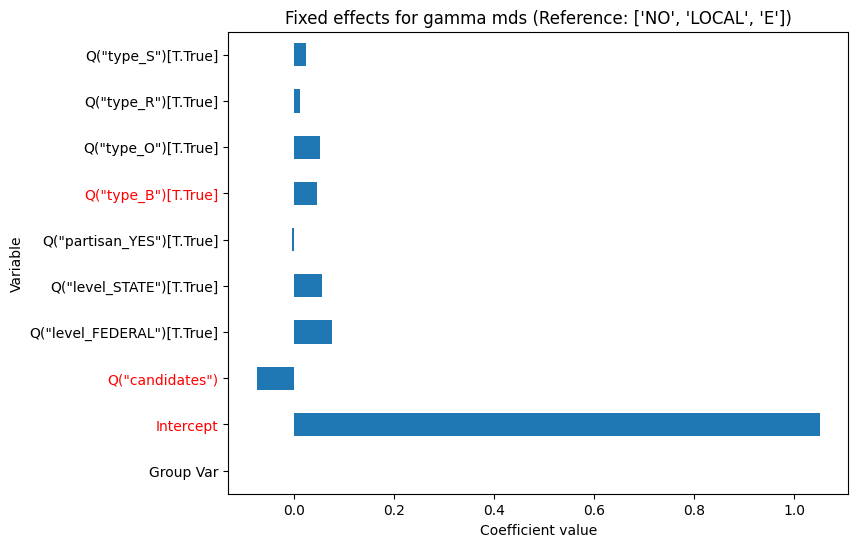

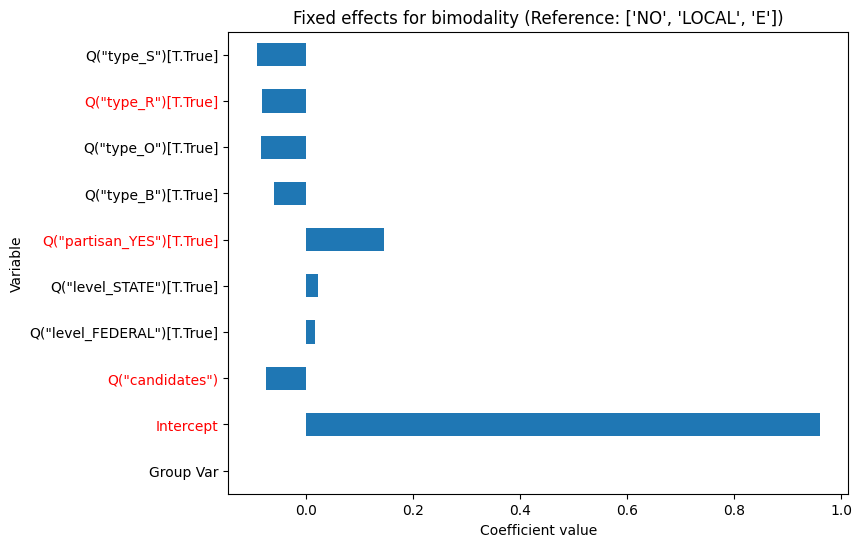

In [33]:
# Fit models and visualize with different reference categories
references = ['NO', 'LOCAL', 'E']
fit_and_visualize(filtered_data, references)

Q("gamma mds") ~ Q("candidates") + Q("partisan_YES") + Q("level_FEDERAL") + Q("level_STATE") + Q("type_B") + Q("type_O") + Q("type_R") + Q("type_S") + Q("candidates"):Q("partisan_YES") + Q("candidates"):Q("level_FEDERAL") + Q("candidates"):Q("level_STATE") + Q("candidates"):Q("type_B") + Q("candidates"):Q("type_O") + Q("candidates"):Q("type_R") + Q("candidates"):Q("type_S")
Q("bimodality") ~ Q("candidates") + Q("partisan_YES") + Q("level_FEDERAL") + Q("level_STATE") + Q("type_B") + Q("type_O") + Q("type_R") + Q("type_S") + Q("candidates"):Q("partisan_YES") + Q("candidates"):Q("level_FEDERAL") + Q("candidates"):Q("level_STATE") + Q("candidates"):Q("type_B") + Q("candidates"):Q("type_O") + Q("candidates"):Q("type_R") + Q("candidates"):Q("type_S")
                        Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         Q("gamma mds")
No. Observations:          327             Method:                     REML          
No. Groups:

/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/es5891/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/mixed_linear_model.py:2201:

                        Mixed Linear Model Regression Results
Model:                    MixedLM         Dependent Variable:         Q("bimodality")
No. Observations:         327             Method:                     REML           
No. Groups:               19              Scale:                      0.0310         
Min. group size:          2               Log-Likelihood:             68.6719        
Max. group size:          82              Converged:                  No             
Mean group size:          17.2                                                       
-------------------------------------------------------------------------------------
                                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------
Intercept                                   0.727    0.084  8.613 0.000  0.561  0.892
Q("partisan_YES")[T.True]                   0.197    0.141  1.401 0.161 -0.079

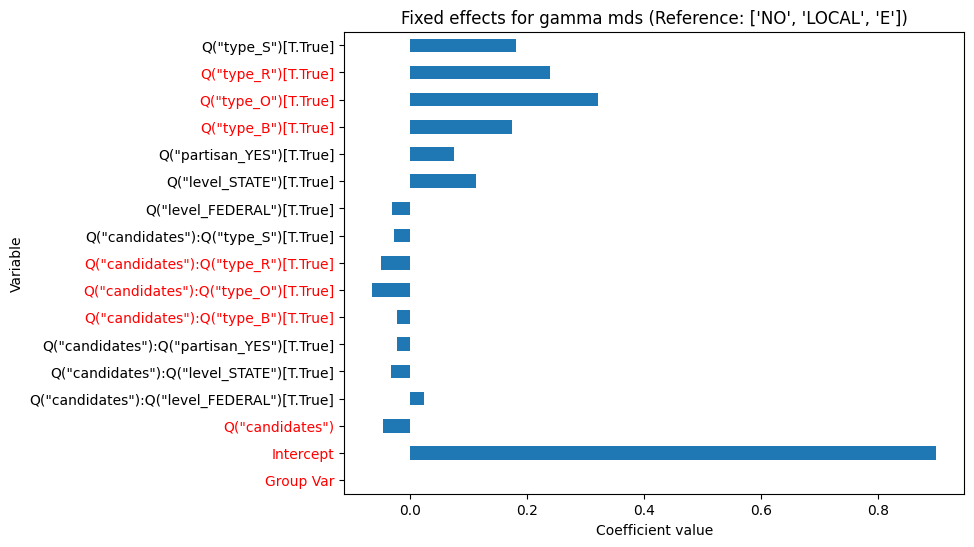

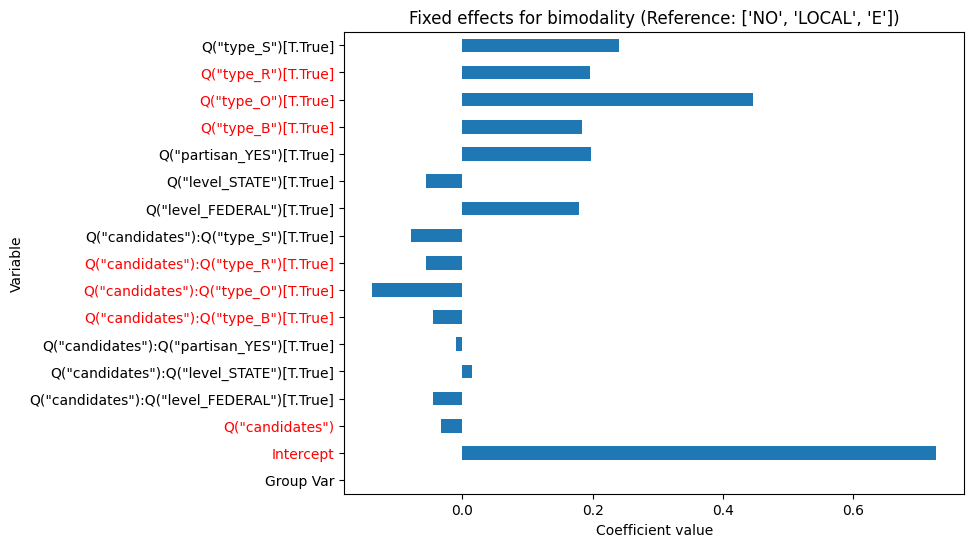

In [32]:
# Fit models and visualize with different reference categories and interaction terms
references = ['NO', 'LOCAL', 'E']
fit_and_visualize_interaction(filtered_data, references)